<a href="https://colab.research.google.com/github/Ademarf/Projeto_Regressao/blob/main/RID190894_Desafio04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analise Descritiva

In [1]:
import pandas as pd

In [2]:
base_mkt = pd.read_csv('/content/MKT (1).csv')
base_mkt.head()

,youtube,facebook,newspaper,sales
0,84.72,19.20,48.96,12.60
1,351.48,33.96,51.84,25.68
2,135.48,20.88,46.32,14.28
3,116.64,1.80,36.00,11.52
4,318.72,24.00,0.36,20.88


In [3]:
base_mkt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171 entries, 0 to 170
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   youtube    171 non-null    float64
 1   facebook   171 non-null    float64
 2   newspaper  171 non-null    float64
 3   sales      171 non-null    float64
dtypes: float64(4)
memory usage: 5.5 KB


In [4]:
base_mkt.describe()

,youtube,facebook,newspaper,sales
count,171.000000,171.000000,171.000000,171.000000
mean,178.021053,27.671579,35.240000,16.922807
std,102.449597,17.913532,24.902918,6.314608
min,0.840000,0.000000,0.360000,1.920000
25%,91.080000,11.700000,13.740000,12.540000
50%,179.760000,26.760000,31.080000,15.480000
75%,262.980000,43.680000,50.880000,20.820000
max,355.680000,59.520000,121.080000,32.400000


#Analise Exploratória

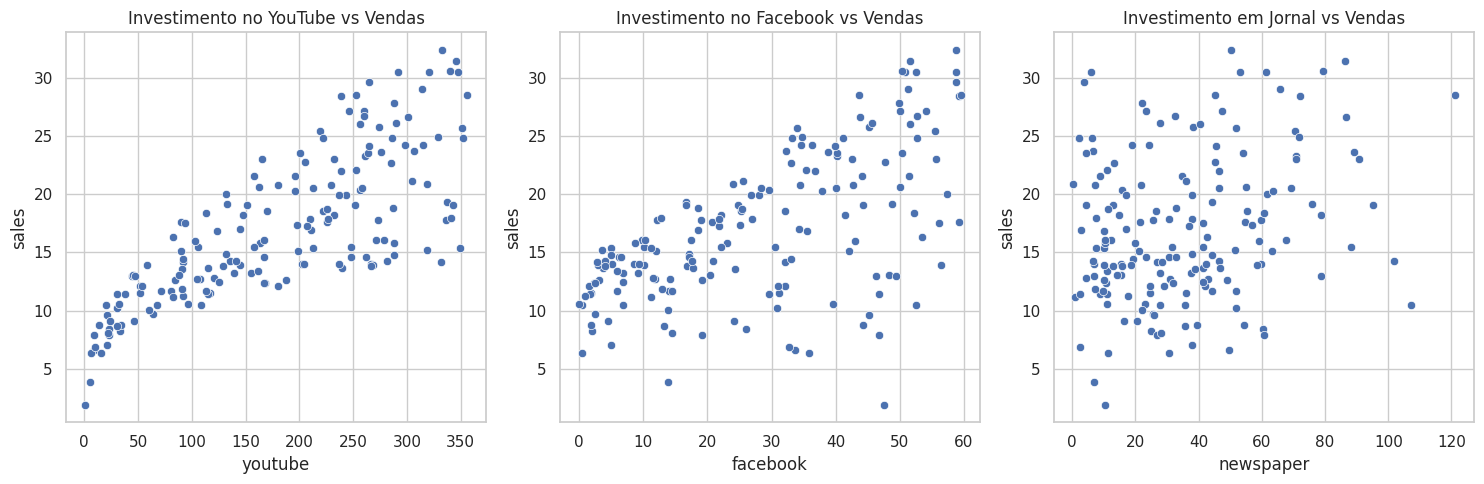

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.scatterplot(x='youtube', y='sales', data=base_mkt)
plt.title('Investimento no YouTube vs Vendas')

plt.subplot(1, 3, 2)
sns.scatterplot(x='facebook', y='sales', data=base_mkt)
plt.title('Investimento no Facebook vs Vendas')

plt.subplot(1, 3, 3)
sns.scatterplot(x='newspaper', y='sales', data=base_mkt)
plt.title('Investimento em Jornal vs Vendas')

plt.tight_layout()
plt.show()


In [6]:
base_mkt.corr()

,youtube,facebook,newspaper,sales
youtube,1.000000,0.086538,0.110759,0.782030
facebook,0.086538,1.000000,0.293425,0.602918
newspaper,0.110759,0.293425,1.000000,0.254987
sales,0.782030,0.602918,0.254987,1.000000


<Axes: >

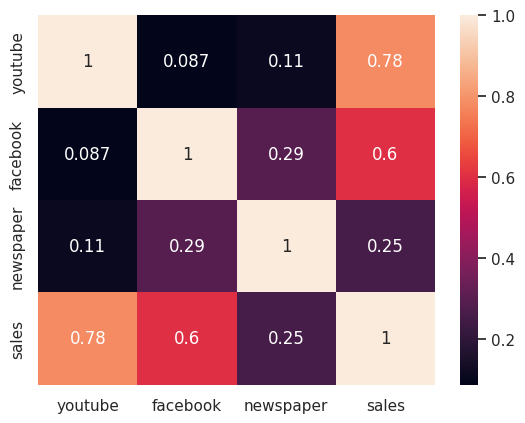

In [7]:
sns.heatmap(base_mkt.corr(), annot=True)

# Modelagem

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

X = base_mkt[['youtube', 'facebook', 'newspaper']]
y = base_mkt['sales']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()

In [9]:
model.fit(X_train, y_train)

LinearRegression()

In [10]:
y_pred = model.predict(X_test)

# Calculando predição

In [11]:
r2 = r2_score(y_test, y_pred)
print(f"Coeficiente de determinação r_quadrado:", r2)

# Suposição de valores que a empresa planeja investir:
# - R$ 200 no YouTube
# - R$ 300 no Facebook
# - R$ 50 no jornal

novo_investimento = pd.DataFrame({
    'youtube': [200],
    'facebook': [300],
    'newspaper': [50]
})

previsao_vendas = model.predict(novo_investimento)

print(f"Com esses investimentos, a previsão de vendas é: {previsao_vendas[0]:.2f}")


Coeficiente de determinação R²: 0.87
Com esses investimentos, a previsão de vendas é: 70.88
